In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [68]:
powerdata = pd.read_excel(r"C:\Users\CEN1\OneDrive - U.S. NRC\CEN1\GAData\Powerdata1.xlsx", index_col=0)

In [69]:
powerdata.head()

,Quarter,DocketNumber,DocketName,Power
Index,,,,
1,2002Q1,5000313,Arkansas Nuclear 1,99.988889
2,2002Q2,5000313,Arkansas Nuclear 1,99.967033
3,2002Q3,5000313,Arkansas Nuclear 1,96.673913
4,2002Q4,5000313,Arkansas Nuclear 1,55.500000
5,2003Q1,5000313,Arkansas Nuclear 1,100.000000


In [70]:
powerdata.groupby(['DocketNumber']).mean()

,Power
DocketNumber,
5000219,91.191030
5000220,92.399066
5000237,92.159288
5000244,93.441117
5000247,91.339917
...,...
5000498,89.487366
5000499,87.584592
5000528,86.543963


In [71]:
actionmatrix = pd.read_excel(r"C:\Users\CEN1\OneDrive - U.S. NRC\CEN1\GAData\ActionMatrixdata.xlsx", index_col=0)

In [72]:
actionmatrix.shape

(7540, 4)

In [73]:
powerdata.shape

(7540, 4)

In [74]:
actionmatrix.tail()

,Quarter,DocketNum,Name,AM Column
Index,,,,
7536,2019Q2,5000482,Wolf Creek 1,1
7537,2019Q3,5000482,Wolf Creek 1,1
7538,2019Q4,5000482,Wolf Creek 1,1
7539,2020Q1,5000482,Wolf Creek 1,1
7540,2020Q2,5000482,Wolf Creek 1,1


In [75]:
powerdata.tail()

,Quarter,DocketNumber,DocketName,Power
Index,,,,
7536,2019Q2,5000482,Wolf Creek 1,99.934066
7537,2019Q3,5000482,Wolf Creek 1,89.130435
7538,2019Q4,5000482,Wolf Creek 1,58.836957
7539,2020Q1,5000482,Wolf Creek 1,97.747253
7540,2020Q2,5000482,Wolf Creek 1,99.582418


In [76]:
actionmatrix.dtypes

Quarter      object
DocketNum     int64
Name         object
AM Column     int64
dtype: object

In [77]:
powerdata.dtypes

Quarter          object
DocketNumber      int64
DocketName       object
Power           float64
dtype: object

In [34]:
#powerdata['DocketNumber'].astype(np.int64)

In [85]:
new_data = pd.merge(powerdata, actionmatrix, how='left', left_index=True, right_index=True, suffixes=("", '_am'))
new_data.tail()

,Quarter,DocketNumber,DocketName,Power,Quarter_am,DocketNum,Name,AM Column
Index,,,,,,,,
7536,2019Q2,5000482,Wolf Creek 1,99.934066,2019Q2,5000482,Wolf Creek 1,1
7537,2019Q3,5000482,Wolf Creek 1,89.130435,2019Q3,5000482,Wolf Creek 1,1
7538,2019Q4,5000482,Wolf Creek 1,58.836957,2019Q4,5000482,Wolf Creek 1,1
7539,2020Q1,5000482,Wolf Creek 1,97.747253,2020Q1,5000482,Wolf Creek 1,1
7540,2020Q2,5000482,Wolf Creek 1,99.582418,2020Q2,5000482,Wolf Creek 1,1


In [86]:
newdata = new_data[['Quarter', 'DocketNumber', 'DocketName', 'Power', 'AM Column']]

In [87]:
newdata.head()

,Quarter,DocketNumber,DocketName,Power,AM Column
Index,,,,,
1,2002Q1,5000313,Arkansas Nuclear 1,99.988889,1
2,2002Q2,5000313,Arkansas Nuclear 1,99.967033,1
3,2002Q3,5000313,Arkansas Nuclear 1,96.673913,1
4,2002Q4,5000313,Arkansas Nuclear 1,55.500000,1
5,2003Q1,5000313,Arkansas Nuclear 1,100.000000,1


In [88]:
newdata.tail()

,Quarter,DocketNumber,DocketName,Power,AM Column
Index,,,,,
7536,2019Q2,5000482,Wolf Creek 1,99.934066,1
7537,2019Q3,5000482,Wolf Creek 1,89.130435,1
7538,2019Q4,5000482,Wolf Creek 1,58.836957,1
7539,2020Q1,5000482,Wolf Creek 1,97.747253,1
7540,2020Q2,5000482,Wolf Creek 1,99.582418,1


In [89]:
newdata.corr()

,DocketNumber,Power,AM Column
DocketNumber,1.000000,-0.003835,-0.036329
Power,-0.003835,1.000000,-0.117834
AM Column,-0.036329,-0.117834,1.000000


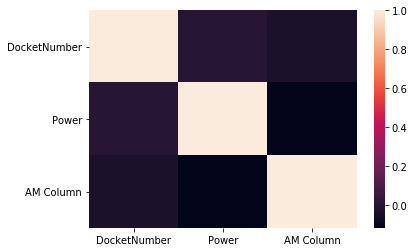

In [90]:
sns.heatmap(newdata.corr())

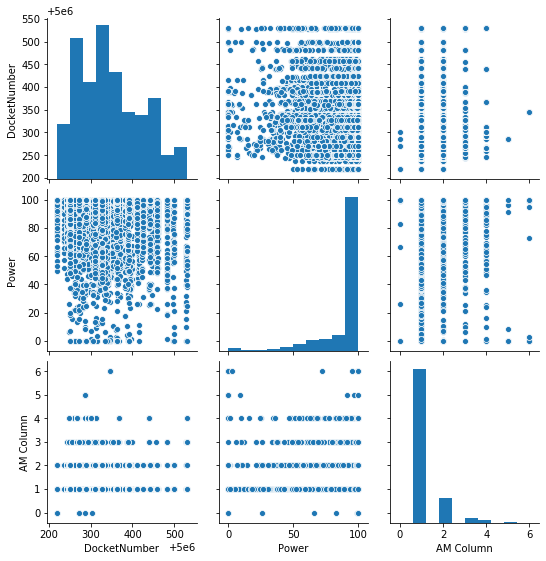

In [93]:
sns.pairplot(newdata);

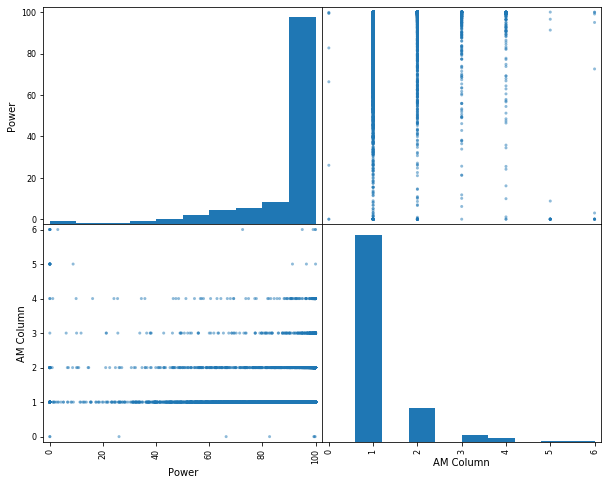

In [92]:
pd.plotting.scatter_matrix(newdata[['Power', 'AM Column']], figsize=(10, 8));

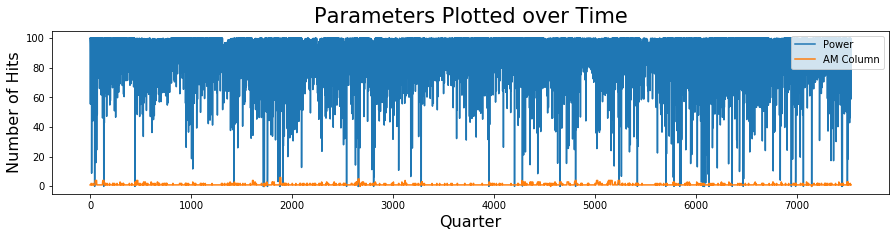

In [97]:
#plot power and action matrix column over time
ax1 = newdata[['Power', 'AM Column']].plot(kind='line', figsize=(15,3));

# Set the title.
ax1.set_title('Parameters Plotted over Time', fontsize=21, y=1.01);

# Move the legend.
ax1.legend(loc=1);

# x-axis labels
ax1.set_ylabel('Number of Hits', fontsize=16);

# y-axis labels
ax1.set_xlabel('Quarter', fontsize=16);